**KANIA ARDHANI PUTRI**

**1301204140**

In [ ]:
# import the python package
import numpy as np
import matplotlib.pyplot as plt
from numpy import matlib
from pywt import wavedec
import math
from PIL import Image
from skimage.transform import resize

In [ ]:
# define a function to covert the image to a gray scale image
def rgb2gray(rgb):
	return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

# define a function to get the proper Haar matrix and permutation matrix
def GetHaarMatrices(N):
	Q = np.matrix("[1,1;1,-1]")
	M = int(N/2)
	T = np.kron(matlib.eye(M),Q)/np.sqrt(2)
	P = np.vstack((matlib.eye(N)[::2,:],matlib.eye(N)[1::2,:]))
	return T,P

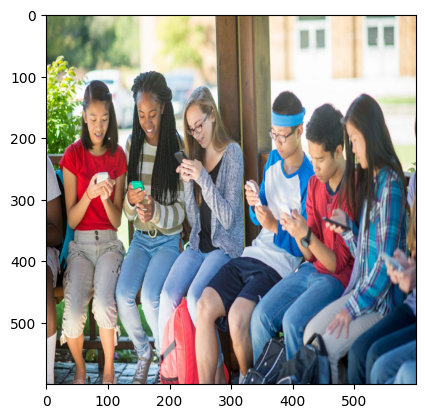

In [ ]:
# reads in a jpeg image
# answer of Q1a
image = Image.open('/content/sample_image.jpg')

# Resize the image
new_size = (600, 600)  # Replace with your desired dimensions
resized_image = image.resize(new_size)

# Convert the image to a NumPy array if needed
resized_array = np.array(resized_image)

# Display the image
plt.imshow(resized_array, cmap='gray')
plt.show()

Kode selanjutnya :mengubah gambar yang sudah diubah ukuran menjadi gambar skala abu-abu (convert('L') dari modul PIL (Pillow))  dan kemudian menampilkannya dalam bentuk plot.

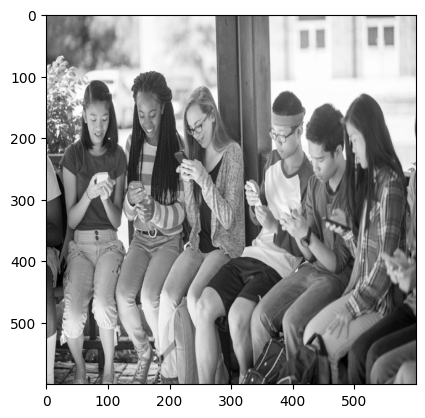

In [ ]:
# Convert the image to grayscale
grayscale_image = resized_image.convert('L')
A = np.array(grayscale_image)

# Show the grayscale image in a figure
plt.imshow(A, cmap=plt.get_cmap('gray'))
plt.show()

Kode selanjutnya :mengubah ukuran gambar grayscale yang disimpan dalam variabel A menjadi matriks berukuran 256x256. Ini dilakukan menggunakan interpolasi bicubic, yang merupakan metode untuk memperkirakan nilai piksel di antara piksel yang ada. Hasil dari operasi ini disimpan dalam variabel A_resized.

Dan secara keseluruhan, potongan kode ini melakukan operasi resize pada gambar grayscale dan kemudian menampilkannya dalam sebuah plot.

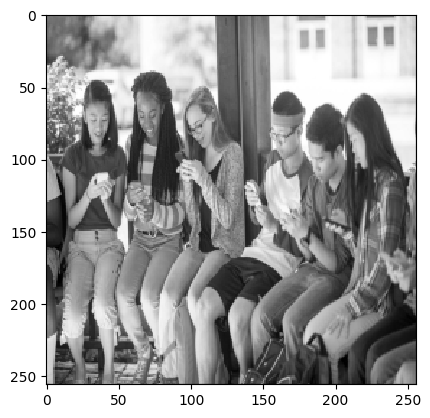

In [ ]:
# resize the gray scale jpeg image in a 256 by 256 matrix
# Assuming A is your grayscale image
# If not, make sure to load the grayscale image first

# Resize the grayscale image to 256x256 using bicubic interpolation
A_resized = resize(A, (256, 256), mode='constant', anti_aliasing=True)

# Show the resized grayscale image
plt.imshow(A_resized, cmap='gray', interpolation='nearest')
plt.show()

Kode selanjutnya : melakukan transformasi Haar 2D pada matriks A dengan menggunakan matriks Haar T dan matriks permutasi P, dan kemudian menampilkan gambar hasil transformasi menggunakan matplotlib.

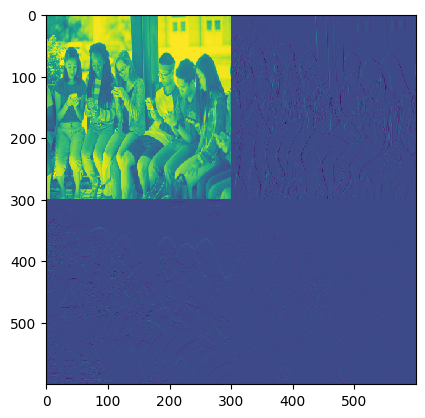

In [ ]:
# Assuming that GetHaarMatrices(600) returns the Haar matrices T and permutation matrix P

# Apply the GetHaarMatrices function to get the Haar and permutation matrices
T, P = GetHaarMatrices(600)

# Assuming A, T, and P are properly defined with compatible dimensions

# Implementing the forward 2D Haar transform of a matrix A dengan menggunakan matriks Haar T dan matriks permutasi P.
#Hasil dari transformasi ini disimpan dalam variabel B.
B = P @ T @ A @ T.T @ P.T
# Show the image after the forward 2D Haar transform
plt.imshow(B, interpolation='nearest')
plt.show()

Kode selanjutnya : melakukan invers transformasi Haar 2D pada matriks B dengan menggunakan matriks Haar invers T.T dan matriks permutasi invers P.T. Hasil invers ini kemudian ditampilkan dalam bentuk gambar menggunakan matplotlib

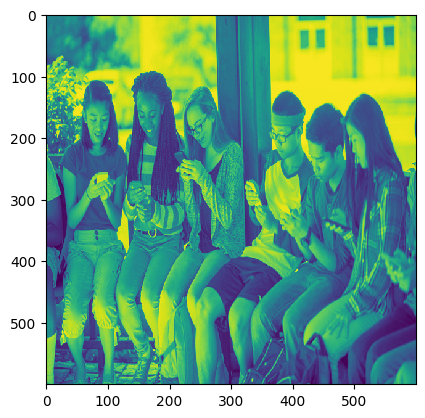

In [ ]:
# implementing the inverse 2D Haar transform of a matrix
inverseB = T.T*P.T*B*P*T

# show the image after the inverse 2D Haar transform of B
plt.imshow(inverseB, interpolation='nearest')
plt.show()

Kode berikut : melakukan transformasi Haar pada vektor s dengan membaginya ke dalam level-level hingga mencapai level penuh, dan mencetak hasil transformasi pada level terakhir.

In [ ]:
# Declare a signal vector s
#Mendefinisikan vektor s sebagai array NumPy dengan elemen [2, 7, 1, 8, 2, 8, 1, 8].
s = np.array([2, 7, 1, 8, 2, 8, 1, 8])

# Check how many levels of Haar transform are needed for full-level processing of s
#Menghitung jumlah level dari transformasi Haar yang dibutuhkan untuk melakukan proses pada level penuh. Ini dihitung berdasarkan logaritma basis 2 dari panjang vektor s.
max_Level = int(math.log2(len(s)))

# Get the transpose of s
#Mengubah vektor s menjadi matriks kolom dengan cara pertama menambahkan dimensi baru menggunakan np.newaxis dan kemudian melakukan transposisi (.T).
s = s[np.newaxis, :].T

# Perform Haar transform for each level
#Memulai loop untuk setiap level dari 0 hingga max_Level-1
for level in range(max_Level):
    # Mendapatkan matriks Haar T dan matriks permutasi P sesuai dengan panjang vektor s.
    T, P = GetHaarMatrices(len(s))

    # Get the result of s after processing at current level
    #Melakukan transformasi Haar pada vektor s dengan menggunakan matriks Haar T dan matriks permutasi P.
    s = np.array(P @ T @ s)

    # Prepare the next level of processing which won't change the second half
    s = s[:len(s)//2]

# Print the forward Haar transform of vector s
print(s)

[[13.08147545]]


Hasil dari transformasi Haar pada level terakhir adalah sebuah matriks dengan satu elemen, yaitu [[13.08147545]]. Hal ini menunjukkan hasil dari transformasi Haar maju pada vektor s setelah melewati sejumlah level transformasi yang dihitung berdasarkan logaritma basis 2 dari panjang vektor s.